In [1]:
# Imports
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession


In [2]:
# Criando o Spark Context
sc = SparkContext(appName = "ny_flights")

In [3]:
# Cria a sessão
spark = SparkSession.builder.getOrCreate()

In [4]:
spark

In [5]:
# Nome do arquivo
arquivo = 'D:/Programacao_SQL/Codigos/nyc_flights/nyc-flights.csv'

In [6]:
# Carrega como dataframe do Spark
df = spark.read.csv(arquivo, header = True)

In [7]:
type(df)

pyspark.sql.dataframe.DataFrame

In [8]:
df.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2013|    6| 30|     940|       15|    1216|       -4|     VX| N626VA|   407|   JFK| LAX|     313|    2475|   9|    40|
|2013|    5|  7|    1657|       -3|    2104|       10|     DL| N3760C|   329|   JFK| SJU|     216|    1598|  16|    57|
|2013|   12|  8|     859|       -1|    1238|       11|     DL| N712TW|   422|   JFK| LAX|     376|    2475|   8|    59|
|2013|    5| 14|    1841|       -4|    2122|      -34|     DL| N914DL|  2391|   JFK| TPA|     135|    1005|  18|    41|
|2013|    7| 21|    1102|       -3|    1230|       -8|     9E| N823AY|  3652|   LGA| ORF|      50|     296|  11|     2|
+----+-----+---+--------+---------+-----

In [9]:
# Cria tabela temporária
df.createOrReplaceTempView("ny_flights")

   Visualizando os 5 primeiros registros

In [10]:

spark.sql("SELECT * FROM ny_flights LIMIT 5").show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2013|    6| 30|     940|       15|    1216|       -4|     VX| N626VA|   407|   JFK| LAX|     313|    2475|   9|    40|
|2013|    5|  7|    1657|       -3|    2104|       10|     DL| N3760C|   329|   JFK| SJU|     216|    1598|  16|    57|
|2013|   12|  8|     859|       -1|    1238|       11|     DL| N712TW|   422|   JFK| LAX|     376|    2475|   8|    59|
|2013|    5| 14|    1841|       -4|    2122|      -34|     DL| N914DL|  2391|   JFK| TPA|     135|    1005|  18|    41|
|2013|    7| 21|    1102|       -3|    1230|       -8|     9E| N823AY|  3652|   LGA| ORF|      50|     296|  11|     2|
+----+-----+---+--------+---------+-----

Descreva todos os tipos de dados da tabela 

In [11]:

spark.sql("DESCRIBE ny_flights").show()

+---------+---------+-------+
| col_name|data_type|comment|
+---------+---------+-------+
|     year|   string|   null|
|    month|   string|   null|
|      day|   string|   null|
| dep_time|   string|   null|
|dep_delay|   string|   null|
| arr_time|   string|   null|
|arr_delay|   string|   null|
|  carrier|   string|   null|
|  tailnum|   string|   null|
|   flight|   string|   null|
|   origin|   string|   null|
|     dest|   string|   null|
| air_time|   string|   null|
| distance|   string|   null|
|     hour|   string|   null|
|   minute|   string|   null|
+---------+---------+-------+



Realizar a contagem de forma descendente de todas as viagens realizadas para 5 destinos 

In [12]:

spark.sql(""" SELECT dest , count(*)
          
          FROM ny_flights
          WHERE dest IN('ATL','ORD','LAX','SJU','DEN') 
          GROUP BY dest
          ORDER BY count(*) desc""").show()

+----+--------+
|dest|count(1)|
+----+--------+
| ATL|    1653|
| ORD|    1588|
| LAX|    1583|
| DEN|     736|
| SJU|     587|
+----+--------+



In [13]:
import matplotlib.pyplot as plt

Realizando a conversação do tipode de estrutura de dados Spark para Dataframe do Pandas

In [14]:
df1=spark.sql(""" SELECT dest , count(*) AS Total_Voos
          
          FROM ny_flights
          WHERE dest IN('ATL','ORD','LAX','SJU','DEN') 
          GROUP BY dest
          ORDER BY count(*) desc""").toPandas()

In [15]:
df1

,dest,Total_Voos
0,ATL,1653
1,ORD,1588
2,LAX,1583
3,DEN,736
4,SJU,587


<Axes: xlabel='dest'>

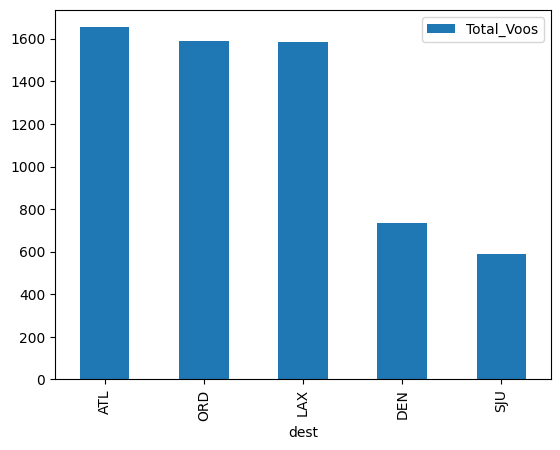

In [16]:
df1.plot(kind='bar',x='dest',y='Total_Voos')

Realiza consulta das inforções relacionada as viagens que possuem distancias maiores que 1000 no destino JFK para as 
repectivas datas 

In [17]:
spark.sql(""" SELECT *
              FROM (SELECT  * 
                    FROM ny_flights
                    WHERE year = 2013 
                    and month = 11 
                    and day = 10 
                    and origin ="JFK") AS T
               WHERE distance > 1000
          """).show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2013|   11| 10|    1626|       -4|    1946|        6|     AA| N338AA|   181|   JFK| LAX|     338|    2475|  16|    26|
|2013|   11| 10|    1155|       -5|    1459|      -21|     DL| N721TW|   423|   JFK| LAX|     336|    2475|  11|    55|
|2013|   11| 10|     655|       -5|    1004|      -11|     VX| N628VA|   399|   JFK| LAX|     345|    2475|   6|    55|
|2013|   11| 10|    1528|       -2|    1846|      -15|     DL| N189DN|   417|   JFK| LAX|     332|    2475|  15|    28|
|2013|   11| 10|    1756|       16|    2130|       12|     B6| N804JB|   135|   JFK| PHX|     296|    2153|  17|    56|
|2013|   11| 10|    1742|        2|    2

In [18]:
df2=spark.sql(""" SELECT CAST(DISTANCE AS INTEGER),
              dest
              FROM (SELECT  *
                    FROM ny_flights
                    WHERE year = 2013 
                    and month = 11 
                    and day = 10 
                    and origin ="JFK") AS T
               WHERE distance > 1000
          """).toPandas()

<Axes: xlabel='dest'>

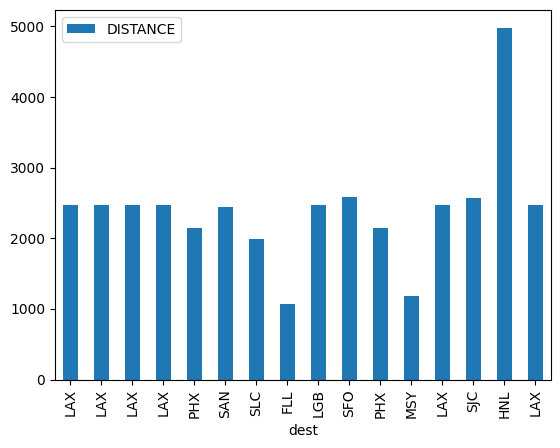

In [19]:
df2.plot(kind='bar',x='dest',y='DISTANCE')

In [20]:
spark.sql("""SELECT carrier, count(*)
FROM ny_flights
WHERE origin = 'JFK'
GROUP BY carrier""").show()

+-------+--------+
|carrier|count(1)|
+-------+--------+
|     UA|     440|
|     AA|    1388|
|     EV|     118|
|     B6|    4166|
|     DL|    2070|
|     US|     302|
|     MQ|     717|
|     HA|      34|
|     VX|     348|
|     9E|    1314|
+-------+--------+



In [21]:
spark.sql("""SELECT dest, count(*)
FROM ny_flights
GROUP BY dest
ORDER BY count(*) desc""").show()

+----+--------+
|dest|count(1)|
+----+--------+
| ATL|    1653|
| ORD|    1588|
| LAX|    1583|
| BOS|    1470|
| CLT|    1383|
| MCO|    1376|
| SFO|    1345|
| MIA|    1220|
| FLL|    1183|
| DCA|     963|
| DTW|     889|
| DFW|     851|
| RDU|     801|
| TPA|     746|
| DEN|     736|
| IAH|     729|
| MSP|     712|
| PBI|     620|
| SJU|     587|
| LAS|     584|
+----+--------+
only showing top 20 rows



NUmero de Voos por destinos do aeroporto e tambem a linha aerea que fornece o Voo. 

In [22]:
spark.sql("""
          SELECT T1.dest, T1.carrier, T2.num
          FROM ny_flights as T1,
          (SELECT dest, count(*) as num FROM ny_flights
          GROUP BY dest) as T2
          WHERE T1.dest = T2.dest
          AND T1.dest IN('ATL','ORD','LAX','SJU','DEN')
          AND T1.carrier IN('VX','B6','MQ','EV','AA') """).show()

+----+-------+----+
|dest|carrier| num|
+----+-------+----+
| LAX|     VX|1583|
| ORD|     AA|1588|
| DEN|     B6| 736|
| ORD|     AA|1588|
| LAX|     AA|1583|
| ORD|     MQ|1588|
| SJU|     B6| 587|
| ORD|     AA|1588|
| ORD|     MQ|1588|
| ORD|     AA|1588|
| ATL|     MQ|1653|
| ATL|     MQ|1653|
| ATL|     EV|1653|
| ATL|     EV|1653|
| LAX|     AA|1583|
| ORD|     MQ|1588|
| LAX|     AA|1583|
| ATL|     EV|1653|
| LAX|     AA|1583|
| ATL|     MQ|1653|
+----+-------+----+
only showing top 20 rows



In [23]:
df3=spark.sql("""
          SELECT T1.dest, T1.carrier, T2.num
          FROM ny_flights as T1,
          (SELECT dest, count(*) as num FROM ny_flights
          GROUP BY dest) as T2
          WHERE T1.dest = T2.dest
          
           """).toPandas()

In [24]:
!pip install plotly

Text(0, 0.5, 'carrier')

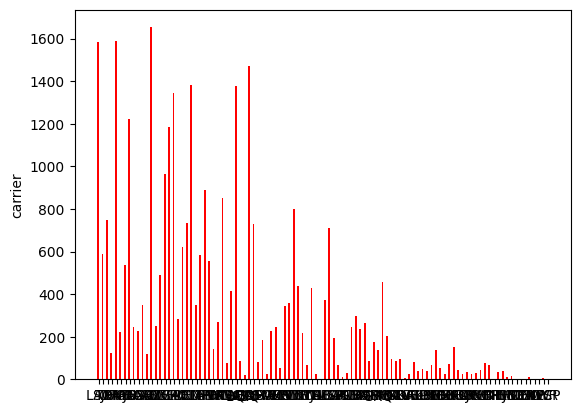

In [25]:
width = 0.4
# criar o primeiro eixo Y
figure, left_ax = plt.subplots()

left_ax.bar(df3['dest'], df3['num'], color='red', width=-width, align='edge')
left_ax.set_ylabel('carrier')



OBS Para facilitar a visualização do grafico de barras utilizaremos outra ferramenta grafica Plotly.

In [26]:
import plotly.graph_objects as go

In [27]:
fig = go.Figure(go.Bar(x=df3['dest'], y=df3['num']))
fig.show()